In [31]:
ls

Untitled.ipynb                         neg28.png
contour features.ipynb                 neg4.png
detect landmarlk.ipynb                 number.jpg
digits.txt                             pos2.png
draft makr.ipynb                       pos4.png
draft_mar21.png                        real-time facial landmark.ipynb
draft_mark1.png                        recognizing digits.ipynb
draft_mark_detect/                     seam carving.ipynb
example.jpg                            seam_carving_input.png
example_01.png                         shape_predictor_68_face_landmarks.dat
example_03.png                         test.pbm
example_04.png                         test2.jpg
eyes blink detect.ipynb                test_gray.jpg
label face landmark.ipynb              text skew correction.ipynb
movie_barcode/                         text_skew_inputs.png


In [32]:
import cv2
from skimage import io , data , color
import imutils

In [33]:
image = cv2.imread("draft_mark1.png")

In [34]:
image.shape

(1268, 2238, 3)

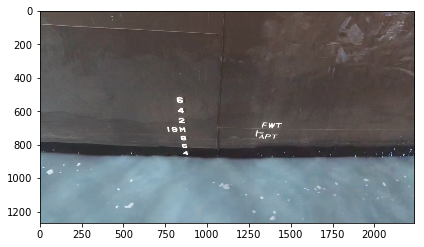

In [35]:
io.imshow(image)
io.show()

In [36]:
image = imutils.resize(image , height=500)

In [37]:
imageL = cv2.cvtColor(image , cv2.COLOR_BGR2LAB)

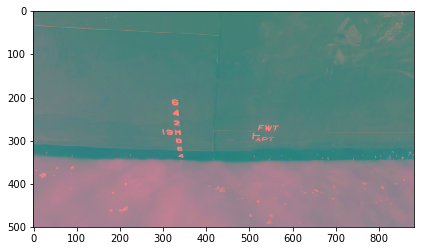

In [38]:
io.imshow(imageL)
io.show()

In [39]:
blurred = cv2.GaussianBlur(imageL , (5 , 5) , 0)

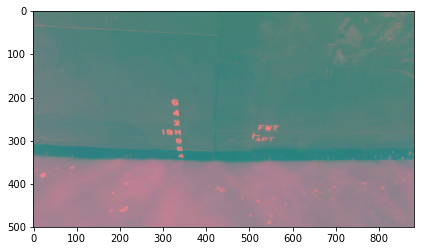

In [40]:
io.imshow(blurred)
io.show()

In [41]:
edged = cv2.Canny(blurred , 50 , 200 , 255)

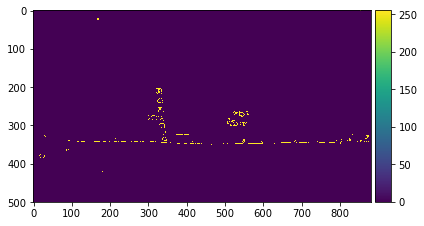

In [42]:
io.imshow(edged)
io.show()

In [43]:
cnts = cv2.findContours(edged.copy() , cv2.RETR_EXTERNAL , cv2.CHAIN_APPROX_SIMPLE)

In [44]:
cnts = cnt[0] if imutils.is_cv2() else cnts[1]

In [45]:
cntsDis = cv2.drawContours(image.copy() , cnts , -1 , (0 , 255 , 0) , 2)

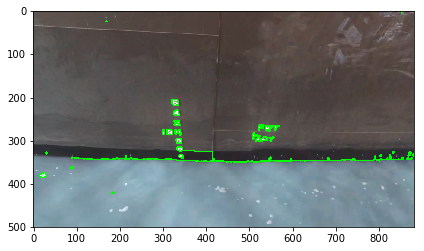

In [46]:
io.imshow(cntsDis)
io.show()

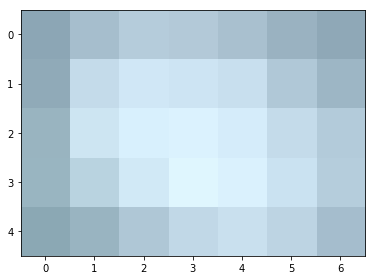

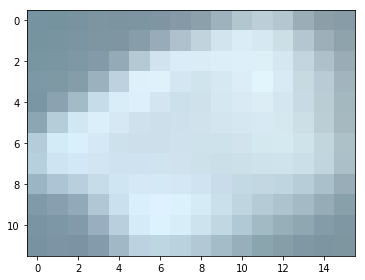

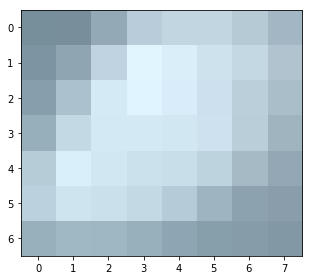

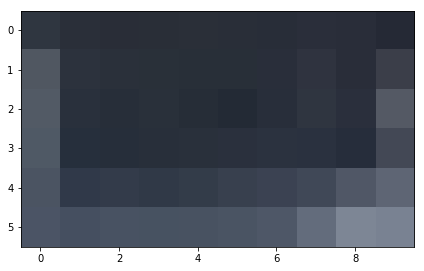

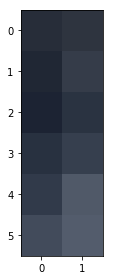

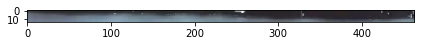

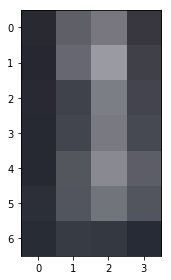

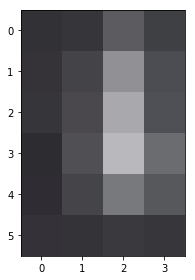

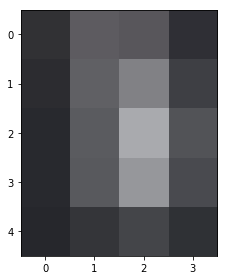

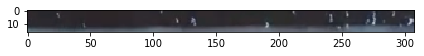

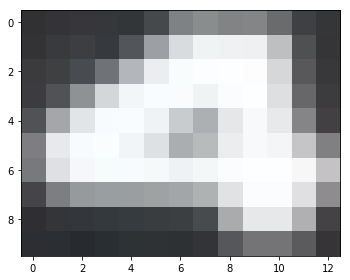

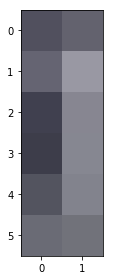

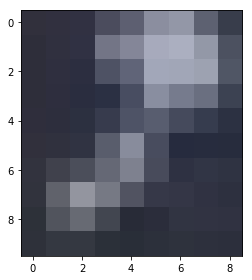

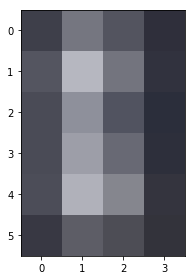

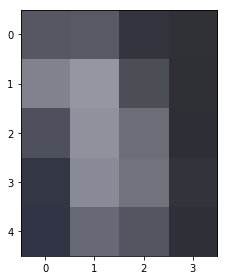

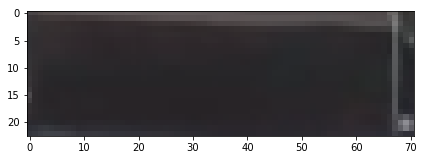

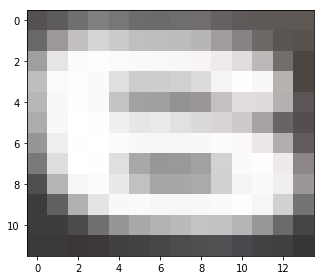

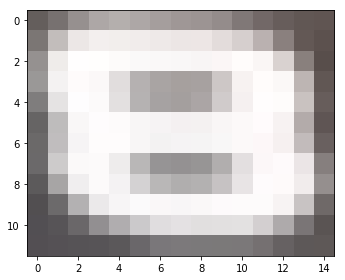

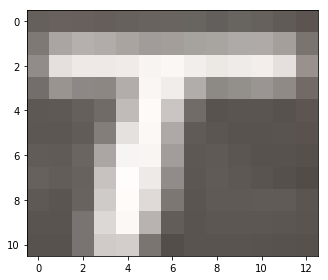

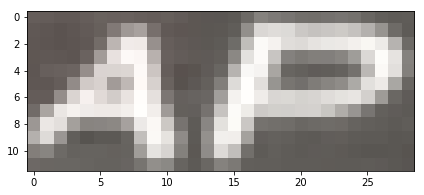

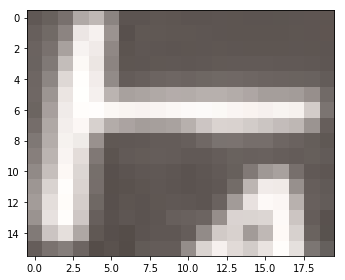

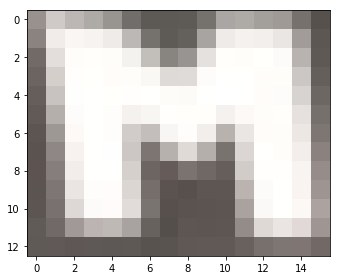

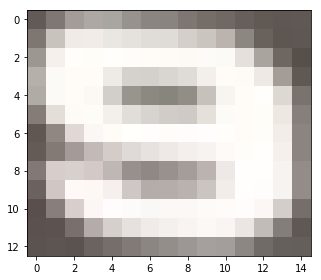

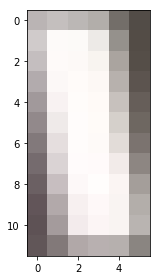

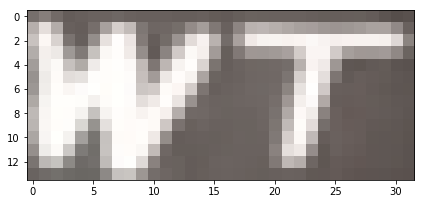

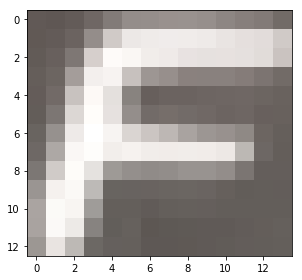

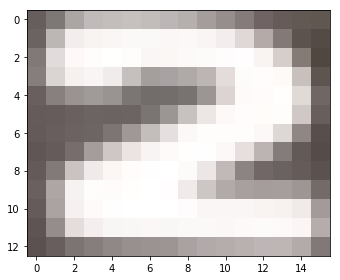

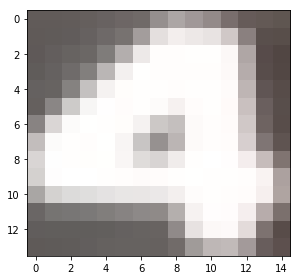

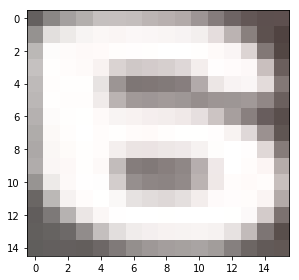

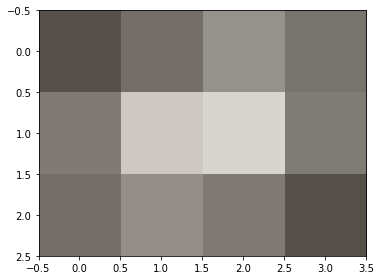

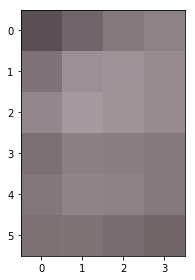

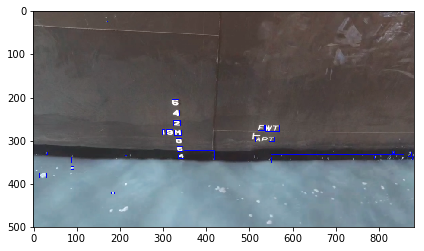

In [47]:
display = image.copy()
for c in cnts:
    x ,y , w , h = cv2.boundingRect(c)
    cv2.rectangle(display , (x , y) , (x + w , y +h) , (0 , 0 , 255) , 1)
    tmp = image[y:y+h , x:x+w]
    io.imshow(tmp)
    io.show()
    
io.imshow(display)
io.show()

In [48]:
from imutils import contours

In [49]:
cnts_sort = contours.sort_contours(cnts , method="top-to-bottom")

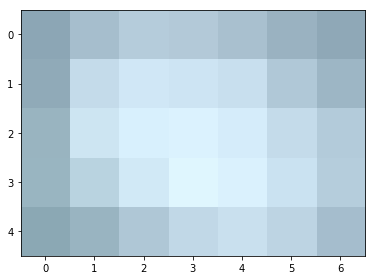

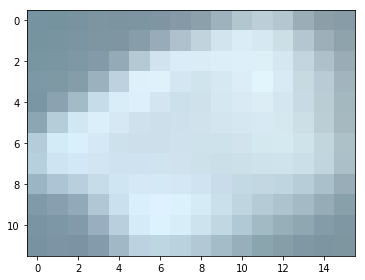

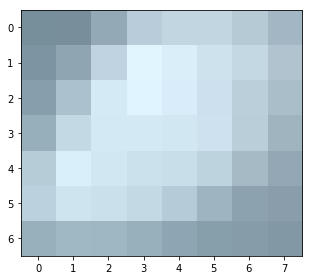

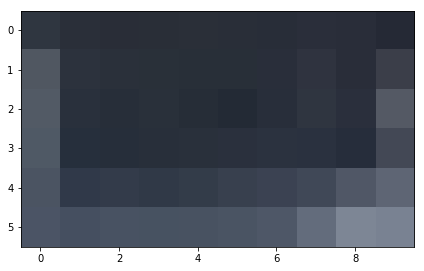

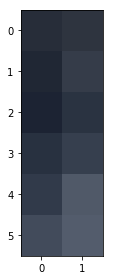

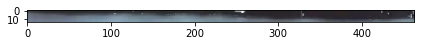

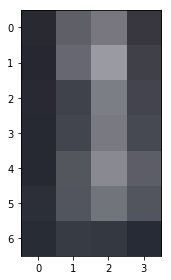

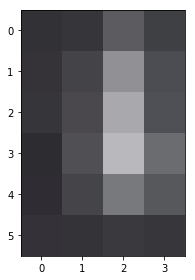

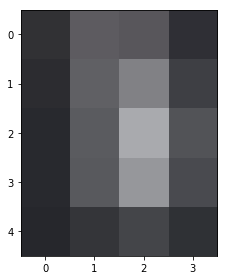

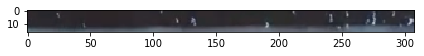

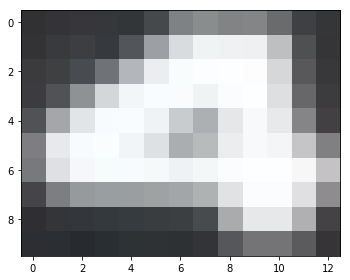

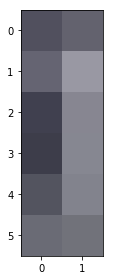

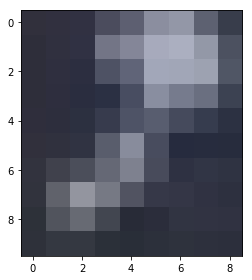

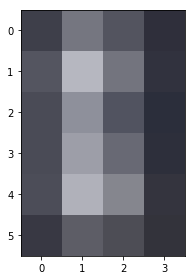

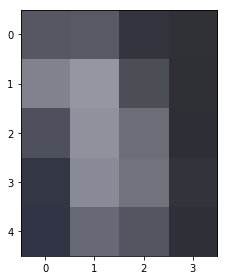

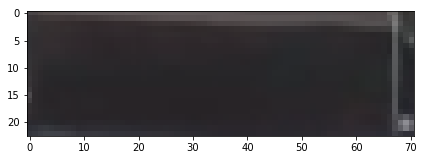

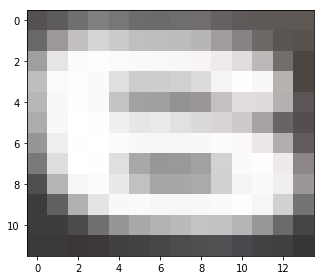

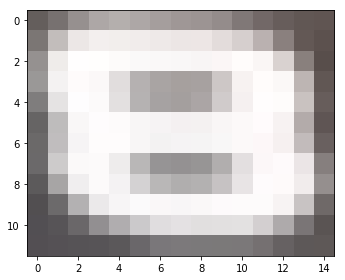

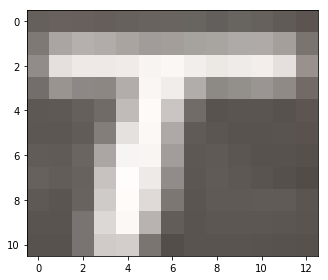

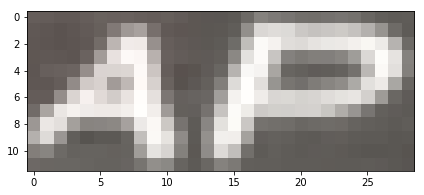

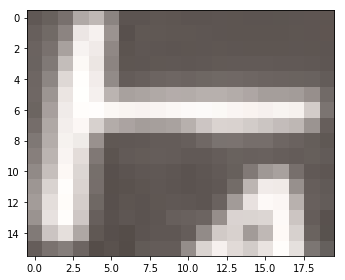

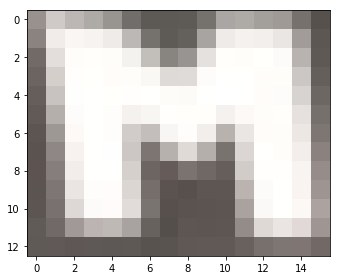

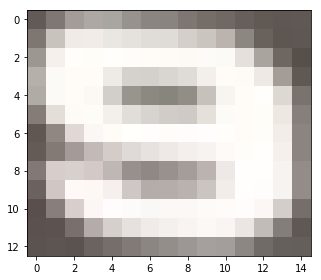

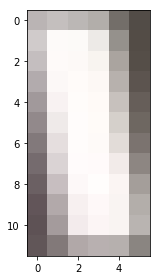

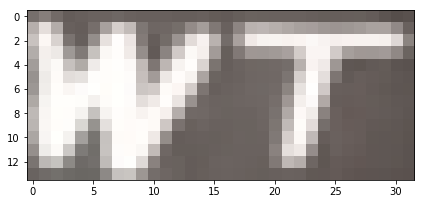

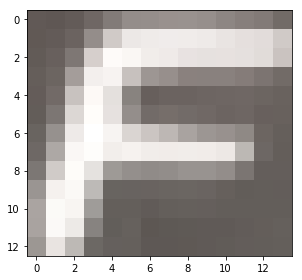

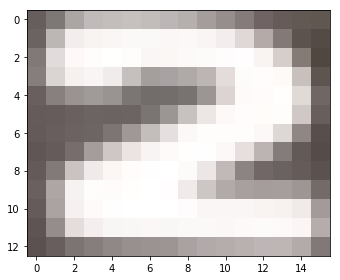

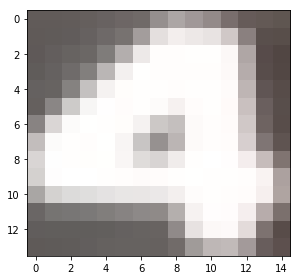

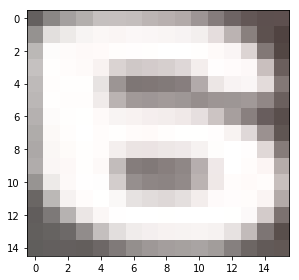

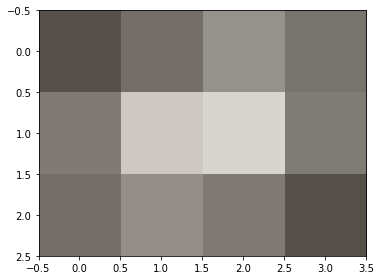

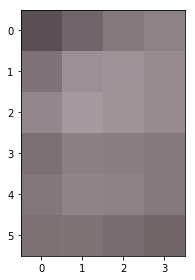

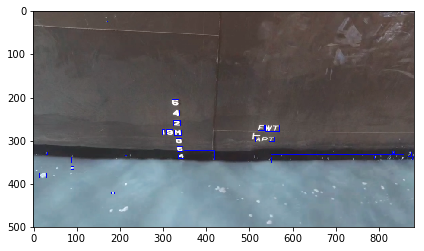

In [50]:
display = image.copy()
for c in cnts:
    x ,y , w , h = cv2.boundingRect(c)
    cv2.rectangle(display , (x , y) , (x + w , y +h) , (0 , 0 , 255) , 1)
    tmp = image[y:y+h , x:x+w]
    io.imshow(tmp)
    io.show()
    
io.imshow(display)
io.show()

In [51]:
gray = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)

In [52]:
blurred = cv2.GaussianBlur(gray , (5 , 5) , 0)

In [53]:
edged = cv2.Canny(blurred , 50 , 200 , 255)

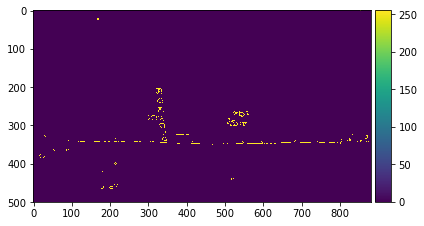

In [54]:
io.imshow(edged)
io.show()

In [55]:
thresh = cv2.threshold(edged , 0 , 255 , cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

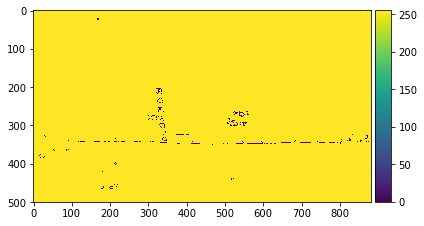

In [56]:
io.imshow(thresh)
io.show()

In [57]:
thresh = cv2.bitwise_not(thresh)

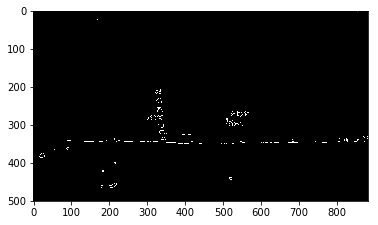

In [58]:
import matplotlib.pyplot as plt
plt.imshow(thresh , plt.cm.gray)
plt.show()

In [59]:
cnts[0].shape

(9, 1, 2)

In [60]:
# displayLine = image.copy()
# rows , cols = displayLine.shape[:2]
# for c in cnts:
#     [vx,vy,x,y] = cv2.fitLine(c, cv2.DIST_L2,0,0.01,0.01)
#     lefty = int((-x*vy/vx) + y)
#     righty = int(((cols-x)*vy/vx)+y)
#     cv2.line(displayLine,(cols-1,righty),(0,lefty),(0,255,0),2)
#     io.imshow(displayLine)
#     io.show()

In [61]:
from skimage import filters

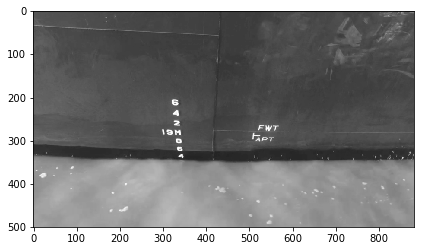

In [62]:
io.imshow(gray)
io.show()

In [63]:
gradX = filters.sobel_h(gray.astype("float"))

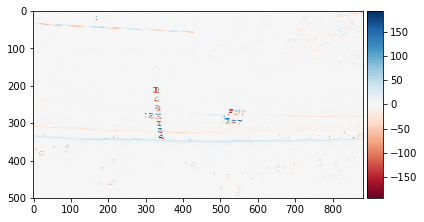

In [64]:
io.imshow(gradX)
io.show()

In [65]:
gradY = filters.sobel_v(gray.astype("float"))

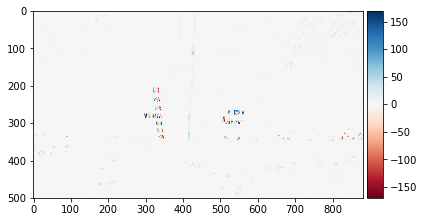

In [66]:
io.imshow(gradY)
io.show()

In [67]:
gradient = filters.sobel(gray.astype("float"))

/Users/zhanghsiungwei/anaconda/envs/tensor/lib/python2.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


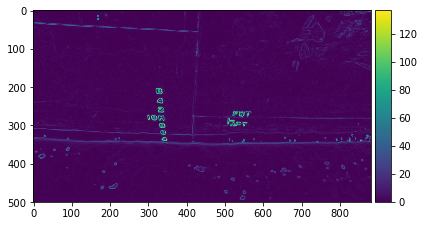

In [68]:
io.imshow(gradient)
io.show()

In [72]:
blurred = cv2.blur(gradient , (9 , 9))

In [73]:
import numpy as np

In [74]:
blurred_int = blurred.astype(np.uint8)

In [75]:
from skimage import img_as_uint

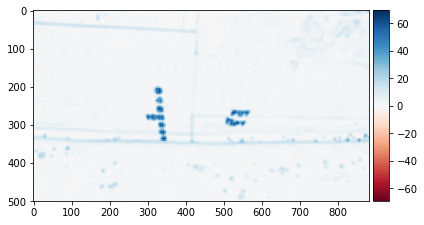

In [76]:
io.imshow(blurred)
io.show()

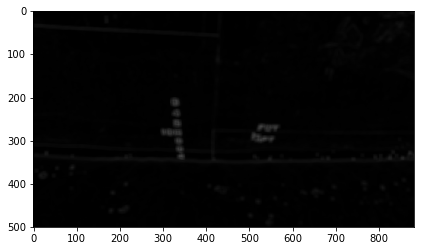

In [77]:
io.imshow(blurred_int)
io.show()

In [78]:
blurred

array([[  0.21957833,   0.23192401,   0.26172911, ...,  22.08936351,
         22.44647468,  22.58331577],
       [  0.21957833,   0.23192401,   0.26172911, ...,  24.06572484,
         24.64817072,  24.86162715],
       [  0.21340549,   0.22193614,   0.2512117 , ...,  20.08174079,
         20.54139072,  20.71353377],
       ..., 
       [  0.28128992,   0.32637911,   0.37496396, ...,   0.65723947,
          0.63353041,   0.62862112],
       [  0.2093914 ,   0.26321031,   0.31766621, ...,   0.54226989,
          0.5212971 ,   0.51924648],
       [  0.26684286,   0.31940362,   0.3651298 , ...,   0.51648413,
          0.50475431,   0.50653901]])

In [79]:
help(cv2.threshold)

Help on built-in function threshold:

threshold(...)
    threshold(src, thresh, maxval, type[, dst]) -> retval, dst



In [80]:
import numpy as np

In [81]:
np.max(blurred_int)

69

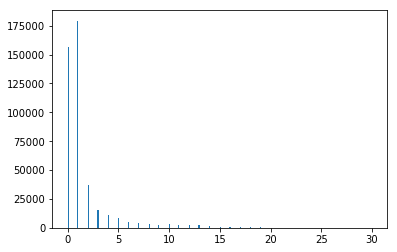

In [82]:
plt.hist(blurred_int.ravel() , 256 , [0 , 30])
plt.show()

In [83]:
_ , thresh = cv2.threshold(blurred_int , 20 , 255 , cv2.THRESH_BINARY)

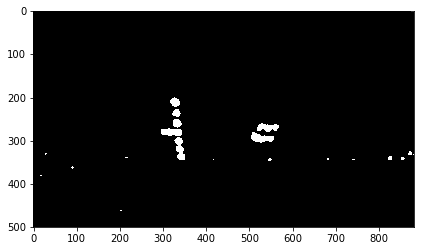

In [84]:
io.imshow(thresh)
io.show()

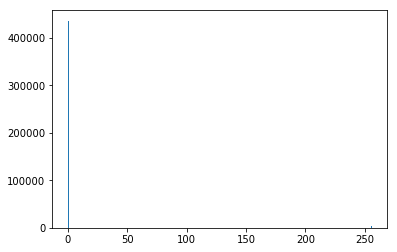

In [85]:
plt.hist(thresh.ravel() , 256 , [0 , 256])
plt.show()

In [86]:
np.unique(thresh)

array([  0, 255], dtype=uint8)

In [87]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT , (21 , 7))

In [88]:
closed = cv2.morphologyEx(thresh , cv2.MORPH_CLOSE , kernel)

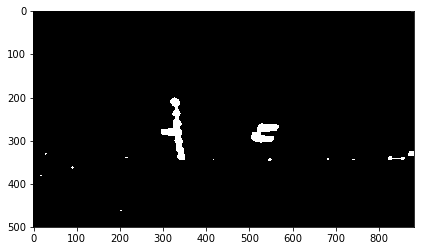

In [89]:
io.imshow(closed)
io.show()

In [90]:
closed = cv2.erode(closed, None, iterations = 4)
closed = cv2.dilate(closed, None, iterations = 8)

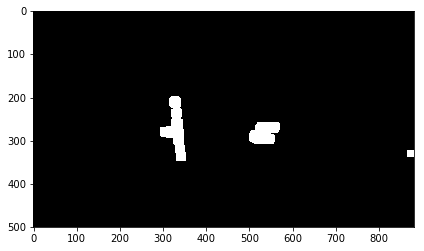

In [91]:
io.imshow(closed)
io.show()

In [92]:
cnts = cv2.findContours(closed.copy() , cv2.RETR_EXTERNAL , cv2.CHAIN_APPROX_SIMPLE)

In [93]:
cnts = cnts[0] if imutils.is_cv2() else cnts[1]

In [94]:
c = sorted(cnts , key = cv2.contourArea , reverse=True)[0]

In [95]:
rect = cv2.minAreaRect(c)

In [96]:
box = cv2.boxPoints(rect)
box = np.int0(box)
res = cv2.drawContours(image.copy() , [box] , 0 , (0 , 0 , 255) , 2)

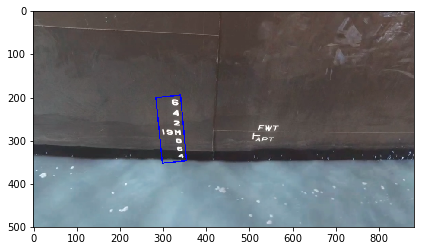

In [97]:
io.imshow(res)
io.show()

In [98]:
final = res.copy()
target_box = box

In [99]:
x , y , w ,h = cv2.boundingRect(c)
res = cv2.rectangle(res , (x , y) , (x + w , y + h) , (0 , 255 , 0) , 2)

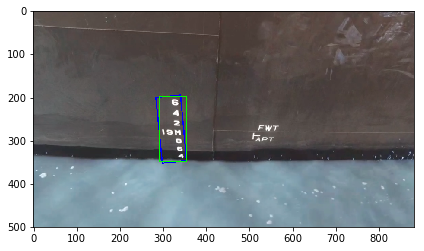

In [100]:
io.imshow(res)
io.show()

In [101]:
from imutils.perspective import four_point_transform

In [102]:
box

array([[299, 352],
       [284, 200],
       [341, 194],
       [355, 346]])

In [103]:
rect

((320.26629638671875, 273.54608154296875),
 (56.838050842285156, 152.64263916015625),
 -5.440331935882568)

In [104]:
angle = rect[-1]

In [105]:
if angle < -45:
    angle = -(90 + angle)
else:
    angle = -angle

In [106]:
(h , w) = image.shape[:2]

In [107]:
center = (w // 2 , h // 2)

In [108]:
center= cv2.moments(c)

In [109]:
center = (int(center['m10']/center['m00']) , int(center['m01']/center['m00']))
center

(330, 272)

In [110]:
help(cv2.boundingRect)

Help on built-in function boundingRect:

boundingRect(...)
    boundingRect(points) -> retval



In [170]:
angle

5.440331935882568

In [111]:
M = cv2.getRotationMatrix2D(center , -angle , 1.0)

In [112]:
rotated = cv2.warpAffine(closed.copy() , M , (w , h) , flags = cv2.INTER_CUBIC , borderMode = cv2.BORDER_REPLICATE)

In [113]:
rotated_image = cv2.warpAffine(image.copy() , M , (w , h) , flags = cv2.INTER_CUBIC , borderMode = cv2.BORDER_REPLICATE)

In [114]:
rotated = cv2.circle(rotated,center,2,(0,255,0),2)

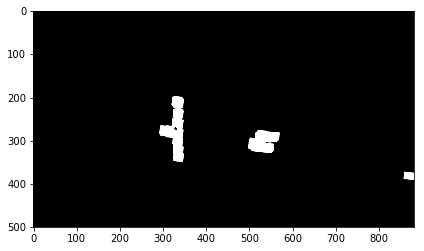

In [115]:
io.imshow(rotated)
io.show()

In [167]:
cnts = cv2.findContours(rotated.copy() , cv2.RETR_EXTERNAL , cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if imutils.is_cv2() else cnts[1]
c = sorted(cnts , key = cv2.contourArea , reverse=True)[0]
rect = cv2.minAreaRect(c)

In [168]:
print rect

((320.0, 272.0), (60.0, 154.0), 0.0)


In [117]:
box = cv2.boxPoints(rect)
box = np.int0(box)
res = cv2.drawContours(rotated_image.copy() , [box] , 0 , (0 , 0 , 255) , 2)

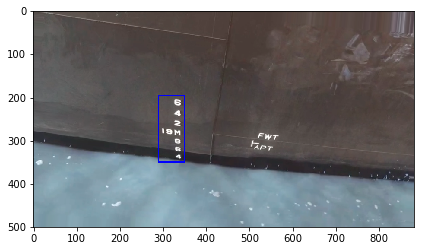

In [118]:
io.imshow(res)
io.show()

In [119]:
wraped = four_point_transform(rotated_image , box.reshape(-1 , 2))

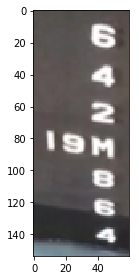

In [120]:
io.imshow(wraped)
io.show()

In [121]:
wraped_gray = cv2.cvtColor(wraped , cv2.COLOR_BGR2GRAY)

In [122]:
gradx = filters.sobel_h(wraped_gray.astype("float"))

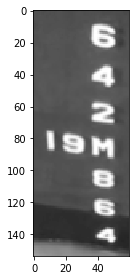

In [123]:
io.imshow(wraped_gray)
io.show()

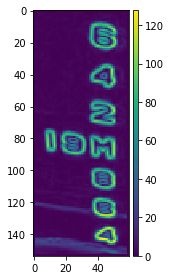

In [124]:
gradent = filters.sobel(wraped_gray.astype("float"))
io.imshow(gradent)
io.show()

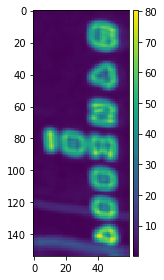

In [125]:
blurred = cv2.blur(gradent , (5 , 5))
io.imshow(blurred)
io.show()

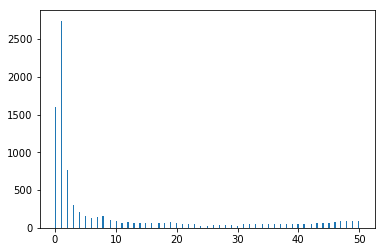

In [126]:
plt.hist(blurred.astype("uint8").ravel() , 256 , [0 , 50])
plt.show()

In [127]:
(_, thresh) = cv2.threshold(blurred.astype("uint8"), 30, 80, cv2.THRESH_BINARY)

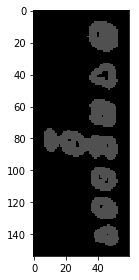

In [128]:
io.imshow(thresh)
io.show()

In [129]:
cnts = cv2.findContours(thresh.copy() , cv2.RETR_EXTERNAL , cv2.CHAIN_APPROX_SIMPLE)

In [130]:
cnts = cnts[0] if imutils.is_cv2() else cnts[1]

In [131]:
max_c = sorted(cnts , key=cv2.contourArea , reverse=True)[0]

In [132]:
cv2.contourArea(max_c)

521.0

In [133]:
rect = cv2.minAreaRect(max_c)
box = cv2.boxPoints(rect)
box = np.int0(box)
res = cv2.drawContours(wraped.copy(),[box],0,(0,0,255),2)

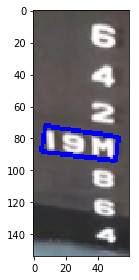

In [134]:
io.imshow(res)
io.show()

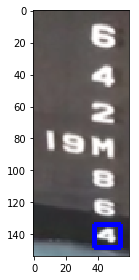

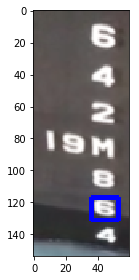

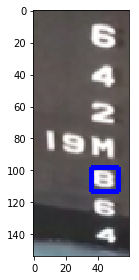

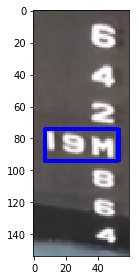

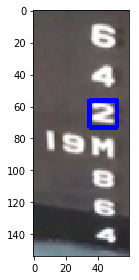

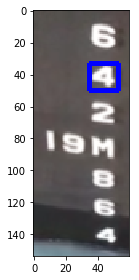

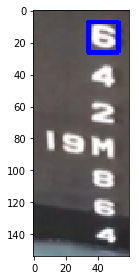

3 521.0


In [135]:
cnt = 0
max_area= cv2.contourArea(cnts[0])
target_c = None
for c in cnts:
    tmp = cv2.contourArea(c)
    if tmp > max_area:
        cnt += 1
        target_c = c
        max_area = tmp
    x , y , w , h = cv2.boundingRect(c)
    tmp = cv2.rectangle(wraped.copy() , (x , y) , (x + w , y + h) ,(0 , 0 , 255) , 2)
    io.imshow(tmp)
    io.show()
    
print cnt , max_areas

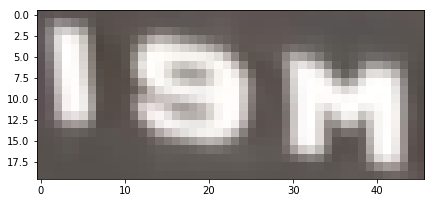

In [136]:
x , y , w , h = cv2.boundingRect(target_c)
target_image = wraped[y:y+h , x:x+w]
io.imshow(target_image)
io.show()

In [137]:
target_image.shape

(20, 46, 3)

In [138]:
io.imsave("number.jpg" , target_image)

In [139]:
import requests
import json
import base64

In [140]:
def getAccessToken():
    clientId = "Us7ACmo15GZ7sYi2zp62YDNn"
    clientSecret = "mzUegljpOH3mlVRGUjnUFcIbxCzpqob9"
    url = "https://aip.baidubce.com/oauth/2.0/token?grant_type=client_credentials&client_id="+ clientId + "&client_secret=" + clientSecret
    access = requests.post(url)

    token = json.loads(access.text)
    print token

    return token['access_token']

In [141]:
def getTextInfo(filename):
    headers = {'Content-Type':'application/x-www-form-urlencoded'}
    baseUrl = u"https://aip.baidubce.com/rest/2.0/ocr/v1/general?access_token=" + getAccessToken()
    data = {'image': base64.b64encode(open(filename , 'rb').read())}
    data['recognize_granularity'] = 'small'
    data['detect_direction'] = True
    data['vertexes_location'] = True

    r = requests.post(baseUrl , data = data , headers = headers)
    info = json.loads(r.text)
    '''
    wordsRes = info['words_result']
    words = wordsRes[0]['words']
    location = wordsRes[0]['location']
    captha = Image.open(filename)
    draw = ImageDraw.ImageDraw(captha)
    x = location['left']
    y = location['top']
    w = location['width']
    h = location['height']
    draw.rectangle((x , y , x + w , y + h) , outline = 'black')
    chars = wordsRes[0]['chars']
    charMap = {}
    for item in chars:
        charMap[item['char']] = item['location']
    for item in charMap.values():
        x = item['left']
        y = item['top']
        w = item['width']
        h = item['height']
        draw.rectangle((x , y , x + w , y + h) , outline = 'blue')
    '''
    return info

In [146]:
into = getTextInfo("number.jpg")

{u'access_token': u'24.c9214a03b7200d0cd89cb5ab0e342d9d.2592000.1501900209.282335-9849023', u'expires_in': 2592000, u'session_secret': u'ca36b7c76bf969bdda53f4a5b43fe882', u'scope': u'public vis-ocr_ocr brain_ocr_scope brain_ocr_general brain_ocr_general_basic brain_ocr_general_enhanced brain_ocr_webimage brain_all_scope brain_ocr_idcard brain_ocr_driving_license brain_ocr_vehicle_license brain_solution wise_adapt lebo_resource_base lightservice_public hetu_basic lightcms_map_poi kaidian_kaidian wangrantest_test wangrantest_test1 bnstest_test1 bnstest_test2 vis-classify_flower', u'session_key': u'9mzdWEmY+yk1YssF9dn/fVnAU2HcD6643DGzH1hnC39NG+lzSIaayjTG/8bgmoZk1bxZgBjDlDws17I7HGnahUlL1i4a', u'refresh_token': u'25.e6148f9518bc1555da7e072367e31682.315360000.1814668209.282335-9849023'}


In [147]:
result = 19 - 3 * 0.1 - 3 *0.1

In [148]:
words = into["words_result"]
words = words[0]["words"]

In [149]:
words

u' I 9 M'

In [154]:
num = words.strip().split()

In [157]:
num

[u'I', u'9', u'M']

In [158]:
num[::-1]

[u'M', u'9', u'I']

In [161]:
number = 0
cnt = 0
for item in num[::-1]:
    
    if not item.isdigit() and item != 'M' and item != 'm':
        if item == 'I':
            number += 1*(10**cnt)
        elif item == 'B':
            number += 8*(10**cnt)
    elif item == 'M' or item == 'm':
        continue
    else:
        number += int(item) * (10**cnt)
        cnt += 1
            

In [162]:
number

19

In [144]:
result

18.4

In [145]:
# cv2.rectangle(image.copy() , (x , y) , (x + w , ))

TypeError: Required argument 'color' (pos 4) not found

In [163]:
r = cv2.putText(final.copy() , str(result) + "M" , (100 , 100) , cv2.FONT_HERSHEY_SIMPLEX , 3 , (0 , 255 , 0) , 2)

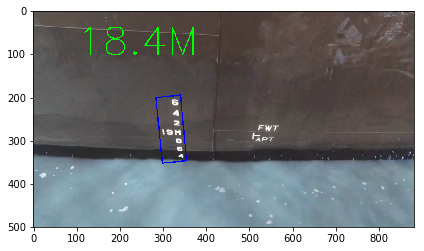

In [165]:
io.imshow(r)
io.show()

In [166]:
help(cv2.imsave)

AttributeError: 'module' object has no attribute 'imsave'